In [48]:

from sklearn.datasets import load_digits,fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [49]:
#mnist = load_digits() # Loading Dataset only 1797 images, I'm going to use different set.
mnist = fetch_openml('mnist_784',as_frame=False) # 70.000!

print("mnist.target:")
print(mnist.target)
print(mnist.target.shape)
print("mnist.data:")
print(mnist.data)
print(mnist.data.shape)
X = mnist.data
y = mnist.target

/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


mnist.target:
['5' '0' '4' ... '4' '5' '6']
(70000,)
mnist.data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(70000, 784)


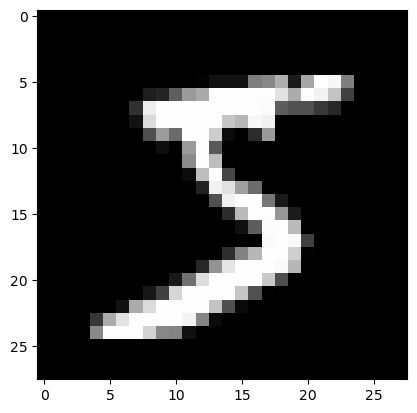

In [50]:
# Show image of the dataset
def show_image(image):
    img = image.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    
show_image(X[0])
#print(X[0])
#print(X[0].shape)
#image = X[0].reshape(28,28) # We have to use reshape? Why is not possible to load just image = X[0]? It is one dimensional array! Image has 2 dimensions!
#print(image)
#print(image.shape)
#plt.imshow(image)
#plt.show()

In [51]:
df_data = pd.DataFrame(mnist.data, columns=mnist.feature_names)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [52]:
df_data.head(20)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df_target = pd.DataFrame(mnist.target, columns=['target'])
df_target.head(50)

,target
0,5
1,0
2,4
3,1
4,9
5,2
6,1
7,3
8,1
9,4


In [54]:
# create test data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [55]:
rf = RandomForestClassifier( random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
pred=rf.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))
print ("Confusion Report")
print(confusion_matrix(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Report
[[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1    0   23 1366    0    9    0   14  

In [57]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [58]:
y_train_5.size

56000

In [59]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5).fit(X_train, y_train_5)

SGDClassifier(random_state=42)

[ True]
None
[False]
None


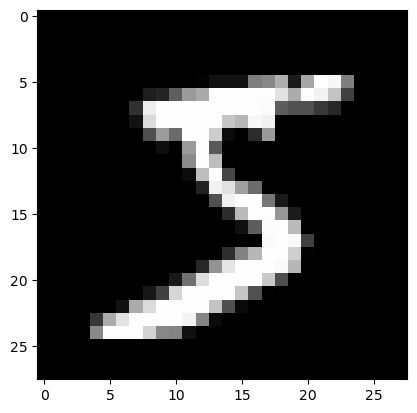

In [60]:
print(sgd_clf.predict([X[11]]))
print(show_image(X[11]))
print(sgd_clf.predict([X[0]]))
print(show_image(X[0]))

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.97192907, 0.96855413, 0.96024858])

In [62]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X[0]) ))

False


In [63]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91000161, 0.91000161, 0.90999679])

Accuracy is above 90%. How can that happen? 10% of the pictures are "5". 

<Axes: ylabel='Count'>

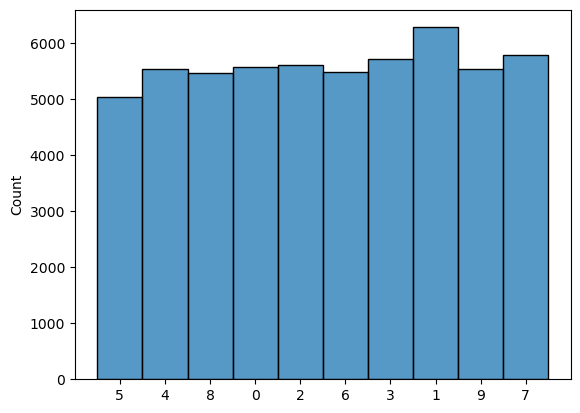

In [64]:
sns.histplot(y_train)

That is way accuracy is not the best metric for classification. If you use unbalanced datasets it's even worse.

In [65]:
from sklearn.model_selection import cross_val_predict


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # do k cross validation, instead of accuracy we get test fold predictions. For every data sample in trainingset a clean prediction.


In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[50287,   673],
       [ 1180,  3860]])

[TP, FP, FN, TN] = cm

In [67]:
y_train_perfect_prediction = y_train_5
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[50960,     0],
       [    0,  5040]])

In [68]:
from sklearn.metrics import classification_report, precision_score, recall_score

precision_score(y_train_5, y_train_pred) # 86% precision

0.8515332009706597

In [69]:
recall_score(y_train_5, y_train_pred) # only finds 76% of the fives

0.7658730158730159

In [70]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred) 

0.8064347644416588

In [71]:
y_scores = sgd_clf.decision_function([X[11]])
y_scores

array([1850.88811131])

In [72]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred # same value as the function predict(), because it is using the threshold 0

array([ True])

In [73]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)# Increase the threshold and u decrease the sensivity
y_some_digit_pred

array([False])

In [74]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function") # We got the decision values. We can calc relevance and sensitivity for all thresholds. 

In [75]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 
print(precisions)
print(recalls)
print(thresholds)

[0.09       0.09000161 0.09000321 ... 1.         1.         1.        ]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.96825397e-04
 1.98412698e-04 0.00000000e+00]
[-144688.24557611 -142277.58984732 -137916.82975639 ...   39729.28625618
   46236.79879883   46403.39381122]


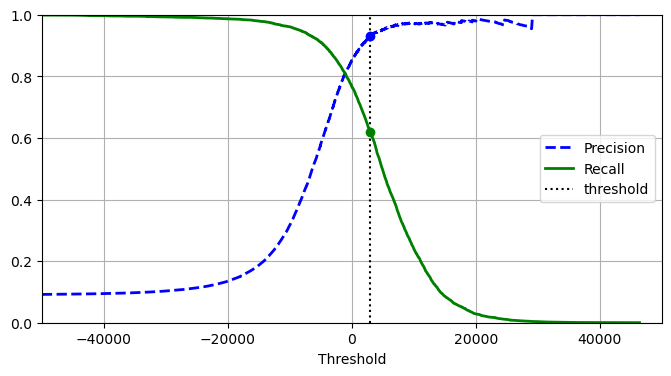

In [76]:


plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
#save_fig("precision_recall_vs_threshold_plot")

plt.show()



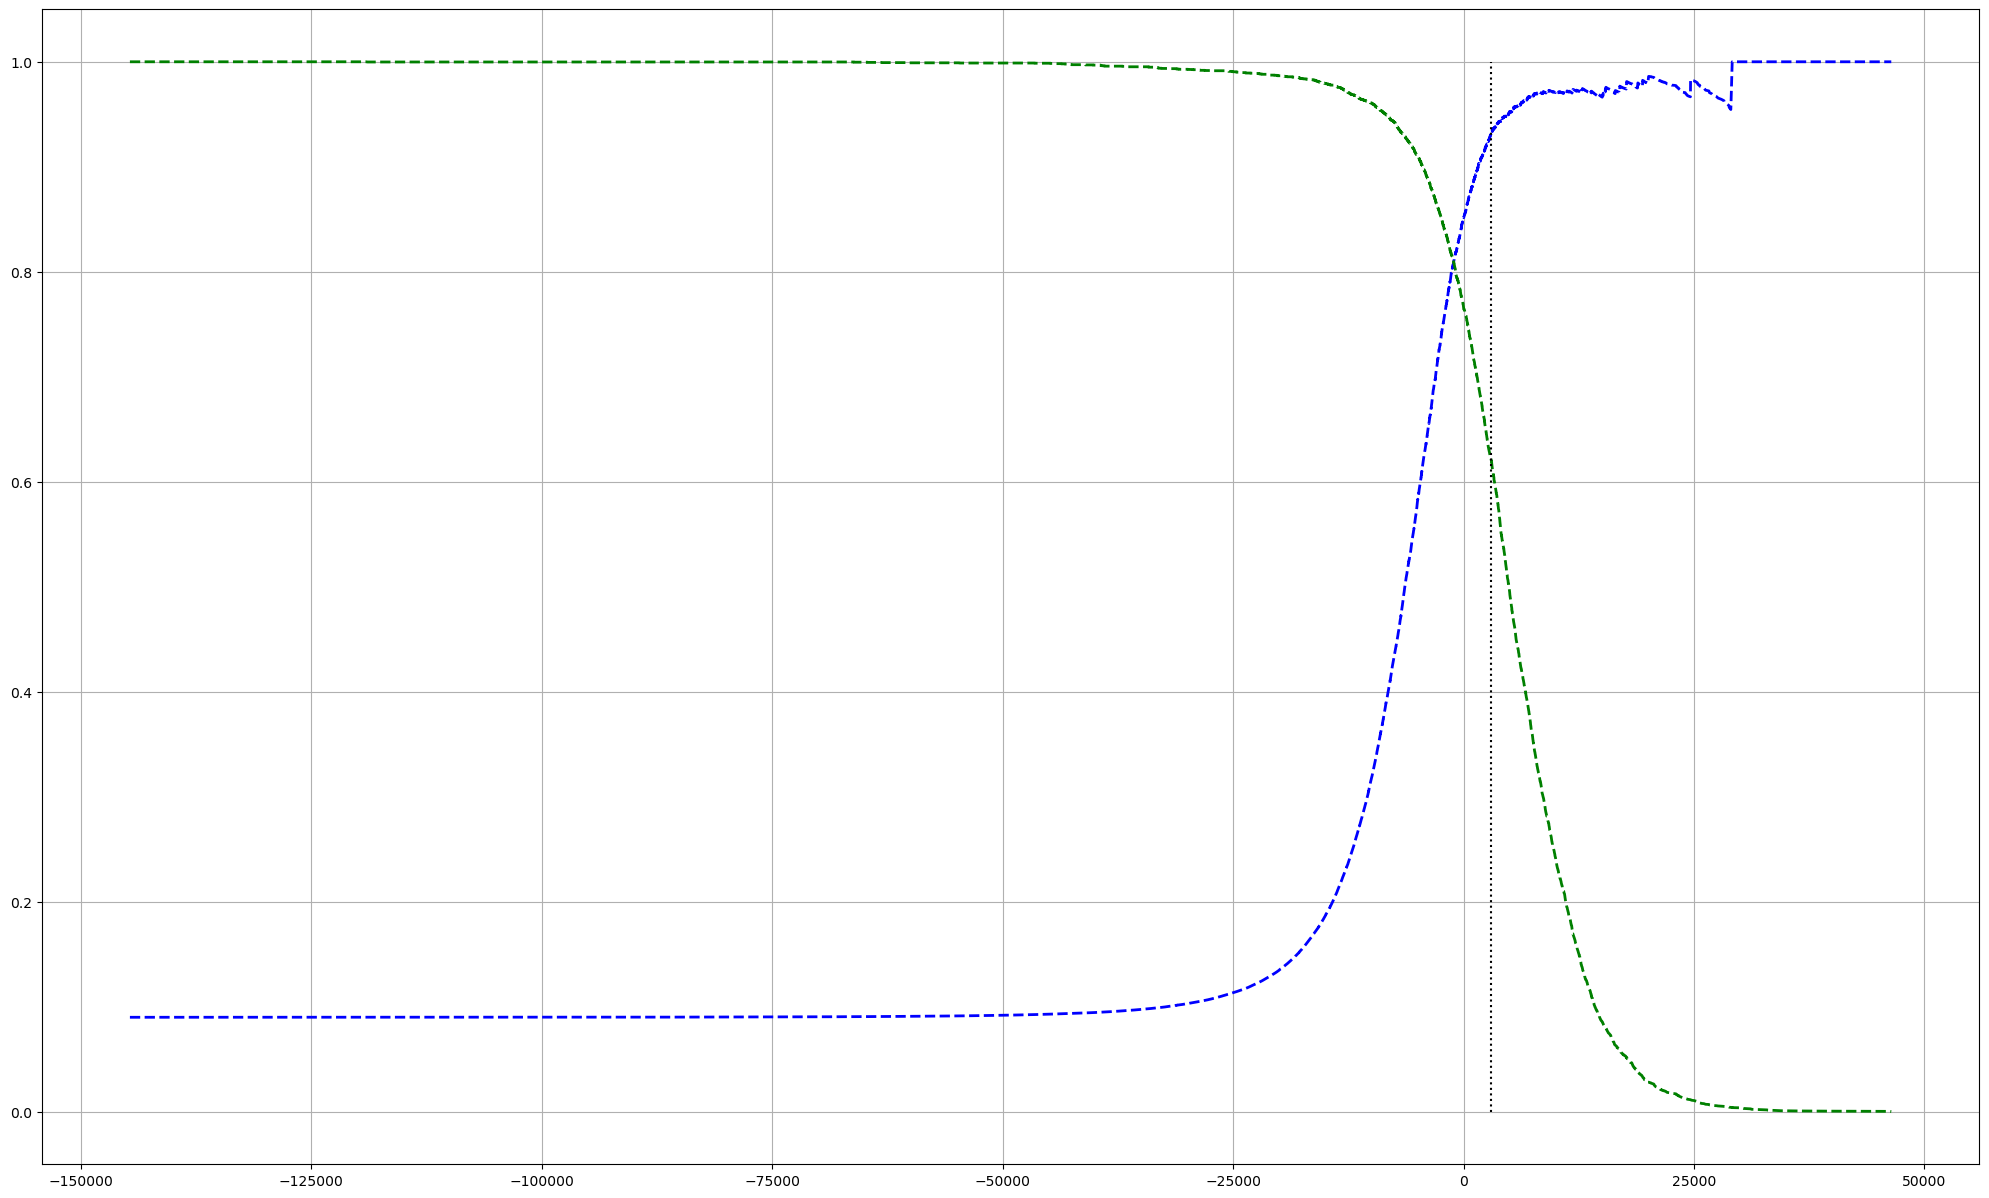

In [77]:
plt.figure(figsize=(25,15))
plt.plot(thresholds, precisions[:-1], "b--", label="Relevanz", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Sensibilität", linewidth=2)
plt.vlines(threshold, 0,1.0, "k", "dotted", label="Schwellenwert")
plt.grid(True)
plt.show()

In [78]:
print(threshold)
idx = (thresholds >= threshold).argmax()
print(idx)
print(precisions[idx])
print(recalls[idx])

3000
52643
0.9314864462317546
0.620436507936508


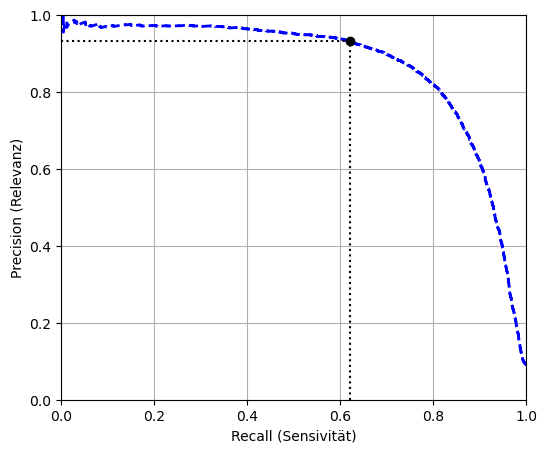

In [79]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(recalls, precisions, "b--", label="Precision/Recalls curve", linewidth=2)
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
        label="Point at threshold 3,000")



plt.xlabel("Recall (Sensivität)")
plt.ylabel("Precision (Relevanz)")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.show()

Precision 90%

In [80]:
idx_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
print(threshold_for_90_precision)
print(recalls[idx_for_90_precision])
print(precisions[idx_for_90_precision])

1583.520690502434
0.6946428571428571
0.9


In [81]:
y_train_pred_90 = (y_scores > threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90) # 90

0.8999742864489586

In [82]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90) # 0.69
recall_at_90_precision

0.6944444444444444

## ROC Curve

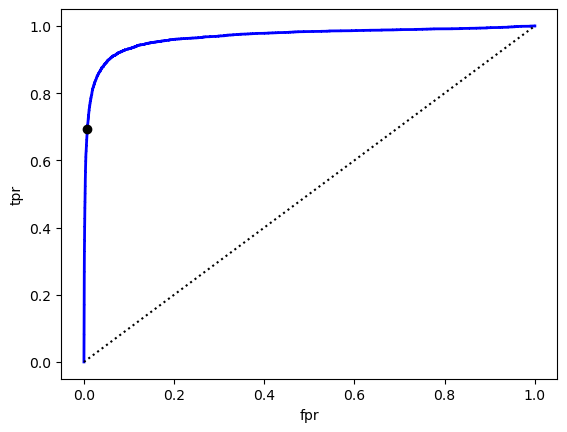

In [83]:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr90, fpr90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, "b-", linewidth=2, label="ROC curve")
plt.plot([0,1],[0,1], 'k:', label="RandomForestClassifiers Roc curve")# thats not want u want, best place is upper left corner
plt.plot([fpr90],[tpr90] , 'ko')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9672937302210262

Now lets creat RandomForestClassifier and compare it to SGDClassifier

In [85]:
forest_clf = RandomForestClassifier(random_state=42)

Problem here is.. at RandomForestClassifier there is not a decision_function() method. So we have to use the predict_proba() method. Returns a list of probabilities for ech instance.

In [86]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [87]:
y_probas_forest[:2] # first picture, 76% is positive, second picture, 99% negative, These are estimated probabilities, no real probabilities!!!!

array([[0.24, 0.76],
       [0.99, 0.01]])

In [88]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

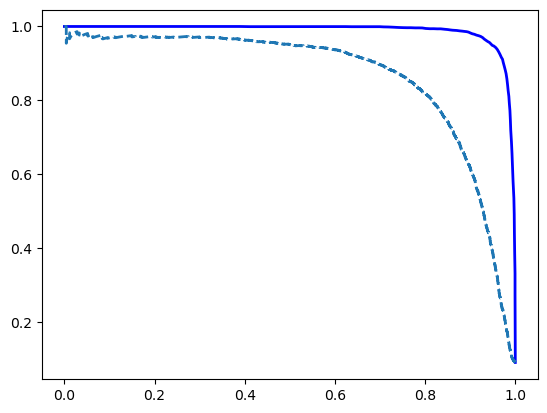

In [89]:
plt.plot(recalls_forest, precisions_forest,"b-", linewidth=2)
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.show()

In [90]:
y_train_pred_forest = y_probas_forest[:,1]  >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9259024699176693

In [91]:
roc_auc_score(y_train_5, y_scores_forest)

0.9982151267100247

# Classification with categories

In [92]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000]) # We should have 45 binary classifications.

SVC(random_state=42)

In [93]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [94]:
some_digit_scores = svm_clf.decision_function([X[11]])
some_digit_scores.round(2) # 9.3 is the biggest value for class 5! 

array([[2.78, 8.2 , 7.27, 2.76, 2.8 , 9.3 , 3.83, 0.76, 6.16, 0.72]])

In [95]:
class_id = some_digit_scores.argmax() # class 5
class_id

5

In [96]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [98]:
svm_clf.classes_[class_id] # in this case is just random, class 5 is also index 5

'5'

In [99]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42)) # building classifier with more categories 
ovr_clf.fit(X_train[:2000], y_train[:2000]) 

OneVsRestClassifier(estimator=SVC(random_state=42))

In [101]:
ovr_clf.predict([X[11]])

array(['5'], dtype='<U1')

In [103]:
len(ovr_clf.estimators_) # 10 classificators 

10

In [104]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X[11]]) 

array(['5'], dtype='<U1')

In [105]:
sgd_clf.decision_function([X[11]]).round() 

array([[-34147., -15938.,  -3820.,  -8575.,  -2618.,   4190., -23030.,
        -12497.,   -310.,  -7379.]])

In [107]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") 

array([0.84212782, 0.87416296, 0.83129755])

In [108]:
# Its getting better! Scale the in data!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.91059088, 0.90625167, 0.90147862])

/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/dan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

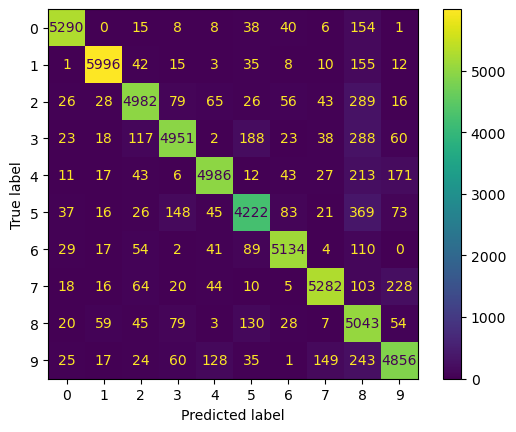

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred) # not normalized
plt.show

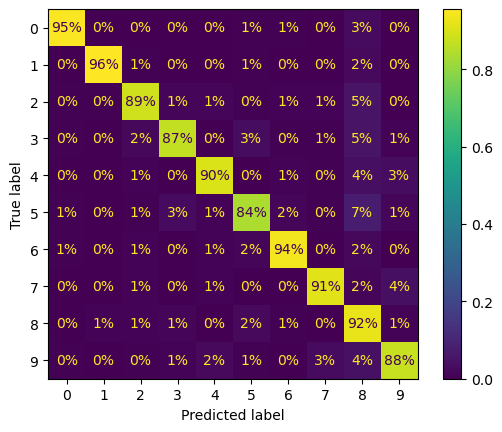

In [110]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%") # normalized, Value/total value (positive Category), Row Summary
plt.show()